## COVID-19 number of deaths in France

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as stats
import math
import datetime

In [11]:
def score(x,y):
    assert(len(x) == len(y))
    out = 0
    for i in range(len(x)):
        out += (x[i] - y[i])**2
    return out

def maximise_score(days_to_peak, deaths):
    peak = len(deaths) + days_to_peak
    N = peak * 2 - 1
    mu = peak
    X = np.linspace(0, N-1, N)
    best = {}
    best['score'] = 9999999
    best['scale'] = 9999999
    best['sigma'] = 9999999
    for scale in range(0,300000,250):
        for sigma in range(10):
            Y = stats.norm.pdf(X, mu, sigma)*scale
            Y = Y[:len(deaths)]
            s = score(deaths,Y)
            if s < best['score']:
                    best['score'] = s
                    best['scale'] = scale
                    best['sigma'] = sigma
    return best

### Number of deaths estimation by simple Gaussian curves

`deaths` variable updated with stats from https://www.worldometers.info/coronavirus/country/france/

Day 0 here is 2020-03-05.

Limitations:
- Number of deaths is underestimated.
- Numbers are not compared to other countries ones.
- Only testing a simple Gaussian model. Not taking into account quarantine, hospital situation etc.

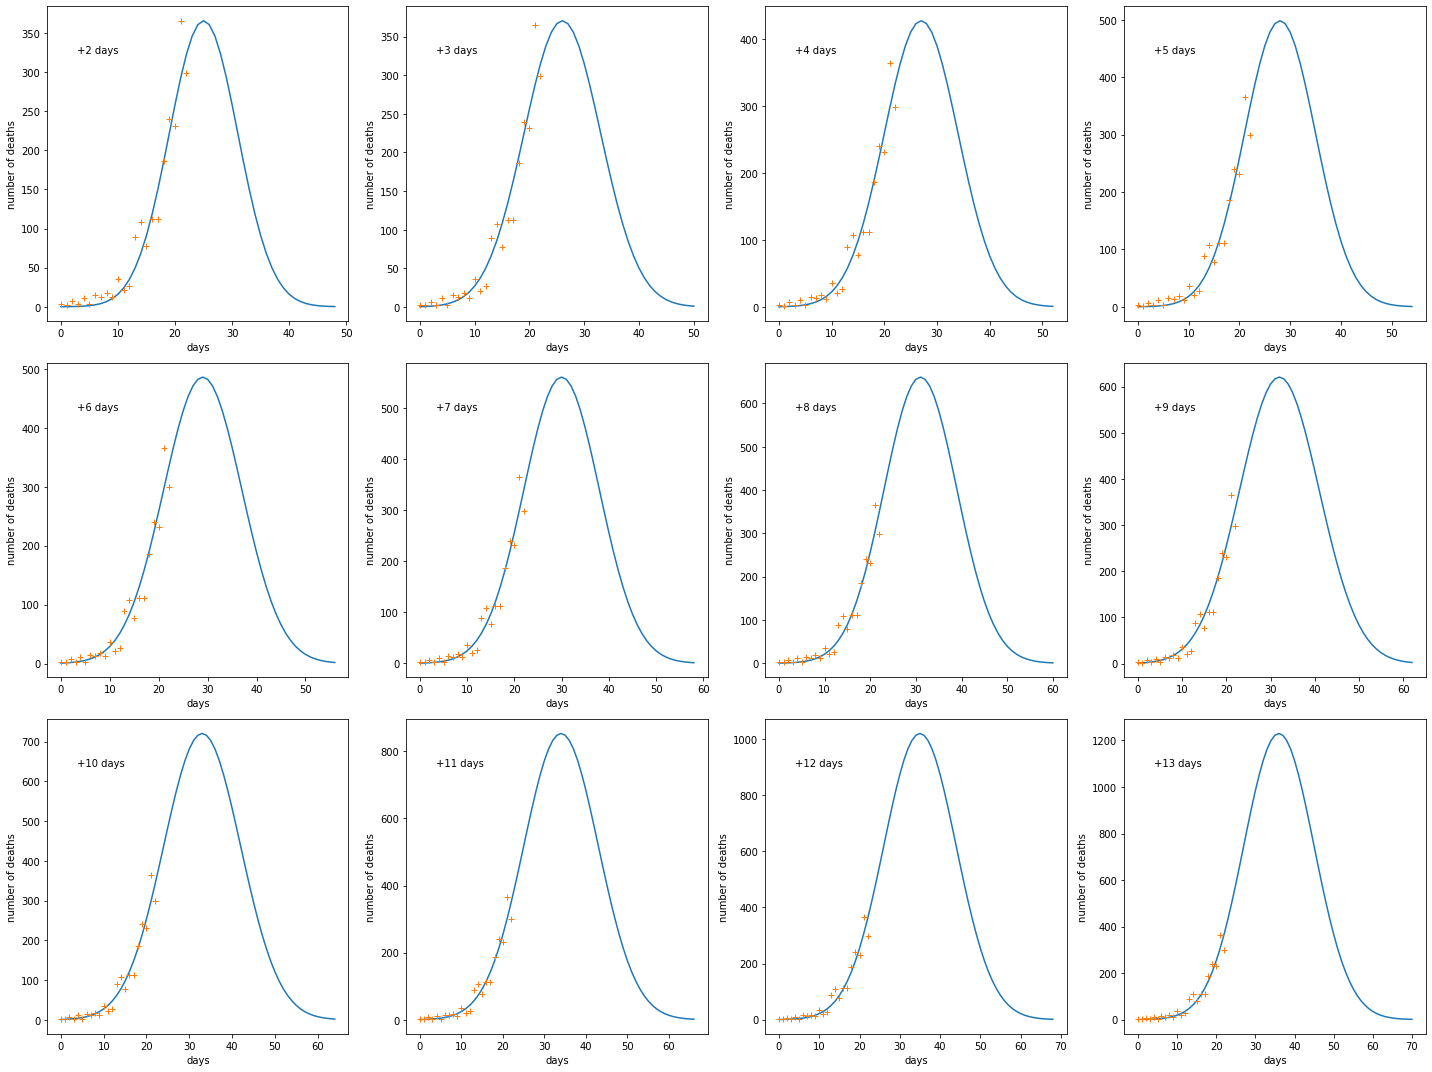

In [18]:
deaths = [3,2,7,3,11,3,15,13,18,12,36,21,27,89,108,78,112,112,186,240,231,365,299]
total_deaths = []
scores = {}
estimations = []

fig, axs = plt.subplots(3,4,figsize=(20, 15), tight_layout=True)

i=0
j=0
for d in range(2,14):
    days_to_peak = d

    best = maximise_score(days_to_peak,deaths)

    peak = len(deaths) + days_to_peak
    N = peak * 2 - 1
    mu = peak
    sigma = best['sigma']
    scale = best['scale']
    scores[d] = best['score']
    
    X = np.linspace(0, N-1, N)
    Y = stats.norm.pdf(X, mu, sigma)*scale
    estimations.append(Y)
    
    total_deaths.append(int(np.round(np.sum(deaths+list(Y[len(deaths):])))))
    
    axs[i][j].plot(X,Y)
    axs[i][j].plot(X[:len(deaths)],deaths,'+')
    axs[i][j].set_xlabel('days')
    axs[i][j].set_ylabel('number of deaths')
    axs[i][j].text(0.1,0.85,'+'+str(d)+' days', transform=axs[i][j].transAxes)
    if j < 3:
        j += 1
    else:
        i += 1
        j = 0

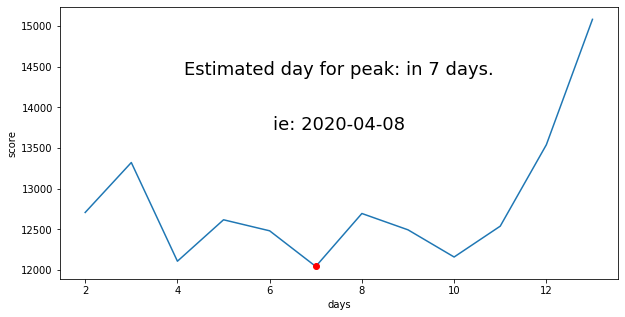

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(np.linspace(2,13,13-2+1),list(scores.values()))
ax.plot([min(scores, key=scores.get)],[min(list(scores.values()))],'ro')
ax.set_xlabel('days')
ax.set_ylabel('score')
ax.text(0.5,0.75,'Estimated day for peak: in '+str(min(scores, key=scores.get))+' days.',transform=ax.transAxes, horizontalalignment='center',fontsize=18)
ax.text(0.5,0.55,('ie: '+str((datetime.date.today() + datetime.timedelta(days=12)).isoformat())),transform=ax.transAxes, horizontalalignment='center',fontsize=18)

plt.show()

### Estimation of total number of deaths

In [21]:
for i in range(2,14):
    print('Number of deaths if peak is in '+str(i)+' days: '+ str(total_deaths[i-2]))

Number of deaths if peak is in 2 days: 5630
Number of deaths if peak is in 3 days: 6485
Number of deaths if peak is in 4 days: 7540
Number of deaths if peak is in 5 days: 8852
Number of deaths if peak is in 6 days: 9709
Number of deaths if peak is in 7 days: 11280
Number of deaths if peak is in 8 days: 13334
Number of deaths if peak is in 9 days: 13950
Number of deaths if peak is in 10 days: 16262
Number of deaths if peak is in 11 days: 19303
Number of deaths if peak is in 12 days: 23095
Number of deaths if peak is in 13 days: 27888
